In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd


In [2]:
moscow = pd.read_csv('Moscow_SVO_2014.csv', skipinitialspace=True)
moscow.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,1,-1,-2,-2,-3,-5,87,81,75,...,10.0,10.0,10.0,21,14,NaN,0.0,8.0,NaN,227<br />
1,2014-1-2,-2,-3,-5,-4,-5,-6,93,87,80,...,10.0,10.0,10.0,18,13,NaN,0.0,8.0,NaN,200<br />
2,2014-1-3,-1,-3,-4,-2,-4,-6,100,89,80,...,10.0,7.0,3.0,21,11,32.0,0.0,8.0,Snow,134<br />
3,2014-1-4,-1,-2,-2,-3,-4,-5,93,85,80,...,10.0,6.0,3.0,18,13,32.0,0.0,8.0,Snow,157<br />
4,2014-1-5,1,0,-1,1,-1,-3,100,93,81,...,10.0,6.0,1.0,26,16,NaN,0.0,8.0,Snow,195<br />


## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [3]:
moscow= moscow.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [5]:
moscow['WindDirDegrees'] = moscow['WindDirDegrees'].str.rstrip('<br />')

and change the values in the `'WindDirDegrees'` column to `float64`:

In [6]:
moscow['WindDirDegrees'] = moscow['WindDirDegrees'].astype('float64')

We definitely need to change the values in the `'GMT'` column into values of the `datetime64`  date type.

In [7]:
moscow['Date'] = pd.to_datetime(moscow['Date'])

We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [8]:
moscow.index = moscow['Date'] 
moscow.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm in the northern hemisphere specifically Moscow I'm going to create a dataframe that holds just those months using the datetime index, like this:

In [11]:
summer= moscow.loc[pd.datetime(2014,6,1) :pd.datetime(2014,8,31)]
summer

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-01,2014-06-01,26,18,10,9,5,1,76,42,20,...,9.0,9.0,9.0,32,18,47.0,0.0,3.0,NaN,116.0
2014-06-02,2014-06-02,27,22,17,12,8,4,68,42,23,...,10.0,10.0,10.0,29,16,43.0,0.0,7.0,Rain,115.0
2014-06-03,2014-06-03,29,20,12,11,6,3,77,40,19,...,NaN,NaN,NaN,21,13,35.0,0.0,NaN,NaN,137.0
2014-06-04,2014-06-04,29,20,11,12,8,2,82,45,18,...,8.0,8.0,8.0,26,11,43.0,0.0,1.0,NaN,108.0
2014-06-05,2014-06-05,31,22,14,14,8,2,77,44,16,...,NaN,NaN,NaN,18,10,35.0,0.0,NaN,NaN,116.0
2014-06-06,2014-06-06,31,22,14,13,9,6,82,45,21,...,10.0,10.0,10.0,32,5,NaN,0.0,6.0,Thunderstorm,154.0
2014-06-07,2014-06-07,30,22,14,17,13,10,94,64,31,...,10.0,9.0,2.0,29,5,29.0,0.0,6.0,Rain-Thunderstorm,144.0
2014-06-08,2014-06-08,27,21,15,15,13,12,94,63,39,...,10.0,9.0,8.0,21,10,NaN,0.0,4.0,NaN,256.0
2014-06-09,2014-06-09,21,17,13,14,12,10,100,74,49,...,10.0,10.0,6.0,26,10,NaN,0.0,6.0,Rain-Thunderstorm,291.0


In [12]:
summer[summer['Mean TemperatureC'] >=25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-30,2014-07-30,32,26,19,16,13,11,69,48,29,...,10.0,9.0,5.0,29,11,40.0,0.0,6.0,Rain,236.0
2014-08-02,2014-08-02,33,26,18,20,16,13,94,65,31,...,10.0,10.0,9.0,47,5,68.0,0.0,6.0,Rain-Thunderstorm,35.0


There are 2 days with temperatures above 25 celcius in Moscow during the summer.

In [13]:
%matplotlib inline

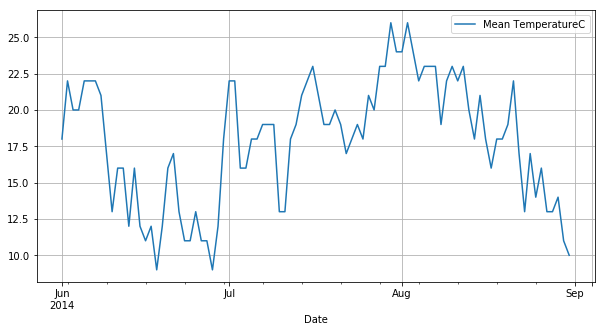

In [14]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5), legend='top left')

Looking at the graph the month between July and August are the hottest with temperatures above 25 degrees celcius and also a lot of days above 20 degrees celcius in the months of july and August

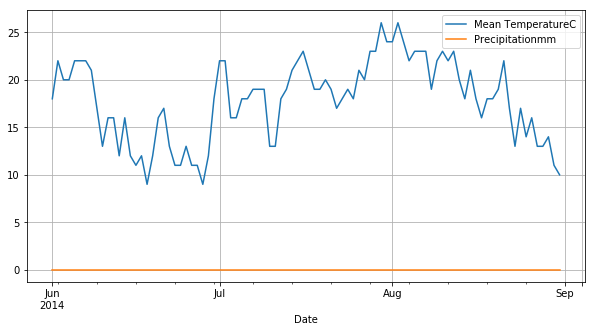

In [15]:
summer[['Mean TemperatureC','Precipitationmm']].plot(grid=True, figsize = (10,5))

There is no precipitation during the summer months in Moscow

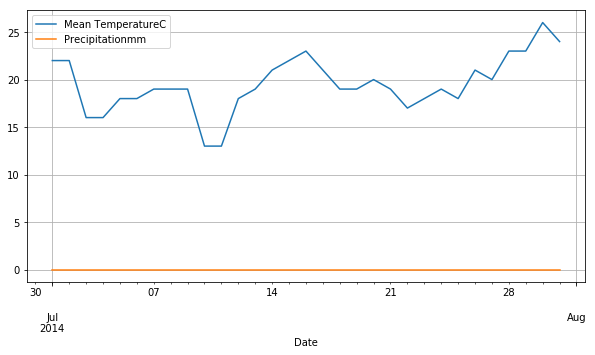

In [17]:
july=summer.loc[pd.datetime(2014,7,1): pd.datetime(2014,7,31)]
july[['Mean TemperatureC','Precipitationmm']].plot(grid=True, figsize=(10,5),legend='top left')

There is no rain at all in Moscow in the months of July to August